<a href="https://colab.research.google.com/github/Miraiinik/Data-Analysis-Projects/blob/main/Titanic_Survival_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_excel('titanic.xls')
df.head()

Saving titanic.xls to titanic (3).xls


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(1309, 14)

In [ ]:
df = df.drop(['name','sibsp','parch','ticket','fare','cabin','embarked','boat','body','home.dest'],axis=1)

In [ ]:
df.columns

Index(['pclass', 'survived', 'sex', 'age'], dtype='object')

In [ ]:
df.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [ ]:
df = df.dropna(axis=0)

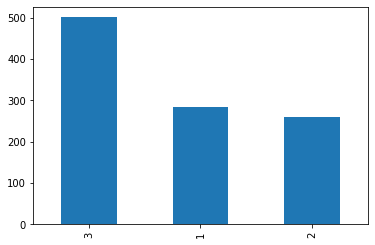

In [ ]:
df['pclass'].value_counts().plot.bar()

In [ ]:
df.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [ ]:
df.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [ ]:
df['sex'].replace(['male','female'],[0,1],inplace=True)#Replace male by 0 and female by 1
df.head()

,pclass,survived,sex,age
0,1,1,1,29.0000
1,1,1,0,0.9167
2,1,0,1,2.0000
3,1,0,0,30.0000
4,1,0,1,25.0000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
y = df['survived']
X = df.drop('survived',axis=1)


0       1
1       1
2       0
3       0
4       0
       ..
1301    0
1304    0
1306    0
1307    0
1308    0
Name: survived, Length: 1046, dtype: int64

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)
model.score(X,y)

0.8279158699808795

In [ ]:
def survie(model,pclass,sex,age):
  x=np.array([pclass,sex,age]).reshape(1,3)
  print(model.predict(x))
  print(model.predict_proba(x))

In [ ]:
survie(model,pclass=3,sex=0,age=26)

[0]
[[0.8 0.2]]
